<h1> Angle Information </h1> 

Ok just to make sure this was not a coincidance...

In [1]:
# own skrips
import myfunctions as mf
import helperfile as hf
# generalls libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import uproot
from tensorflow.keras.optimizers import Adam
import time
from scipy.optimize import curve_fit

In [2]:
rootfile = uproot.open('./stage3_clusters_corr_newdata.root')
ipd = hf.InputData(rootfile)
ipd.form_cluster()
ipd.train_test_split()
ipd.prep_trainingsdata()
ipd.prep_verificationdata()

Initialized object
Start shaping clusters in a  (5, 5)  grid...
Shaping the clusters took  147.47413063049316 s
Splitted data into training and test set!
Prepared 'training' data
Prepared 'veri_truth' data
Prepared 'veri_fit' data


In [3]:
num_fit = ipd.num_fit
ind_bad0 = np.where(num_fit == 0)
ind_bad1 = np.where(num_fit == 1)
ind_bad2 = np.where(num_fit == 2)
ind_bad3 = np.where(num_fit == 3)
print("number of 0 coral showers: ", len(ind_bad0[0]))
print("number of 1 coral showers: ", len(ind_bad1[0]))
print("number of 2 coral showers: ", len(ind_bad2[0]))
print("number of 3 coral showers: ", len(ind_bad3[0]))

number of 0 coral showers:  0
number of 1 coral showers:  626674
number of 2 coral showers:  1869
number of 3 coral showers:  5


In [4]:
model = keras.Sequential([layers.Input(shape=(25)),
                         layers.Normalization(mean=3.9, variance=16.2), 
                         layers.Dense(64, activation="relu"),
                         layers.Dense(128, activation="relu"),
                         layers.Dense(256, activation="relu"),
                         layers.Dense(128, activation="relu"),
                         layers.Dense(64, activation="relu"),
                         layers.Dense(32, activation="relu"),
                         layers.Dense(3, activation=None)])
model.summary()
model.compile(loss="mean_squared_error", optimizer=Adam(learning_rate=0.00001))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 25)                0         
_________________________________________________________________
dense (Dense)                (None, 64)                1664      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2

In [5]:
a = time.time()
fit_hist = model.fit(ipd.clusters_t, ipd.training, batch_size=64, epochs=200, validation_split=0.1)
b = time.time()

print("This took ", (b-a)/60, "min")

Epoch 1/200
7072/7072 [==============================] - 7s 905us/step - loss: 407.3443 - val_loss: 16.2186
Epoch 2/200
7072/7072 [==============================] - 6s 895us/step - loss: 9.7622 - val_loss: 7.4146
Epoch 3/200
7072/7072 [==============================] - 6s 904us/step - loss: 6.3213 - val_loss: 5.9276
Epoch 4/200
7072/7072 [==============================] - 6s 902us/step - loss: 5.2648 - val_loss: 5.1496
Epoch 5/200
7072/7072 [==============================] - 6s 896us/step - loss: 4.7485 - val_loss: 4.7942
Epoch 6/200
7072/7072 [==============================] - 6s 899us/step - loss: 4.4719 - val_loss: 4.5820
Epoch 7/200
7072/7072 [==============================] - 6s 892us/step - loss: 4.3031 - val_loss: 4.4770
Epoch 8/200
7072/7072 [==============================] - 6s 896us/step - loss: 4.1802 - val_loss: 4.3814
Epoch 9/200
7072/7072 [==============================] - 6s 897us/step - loss: 4.0914 - val_loss: 4.2833
Epoch 10/200
7072/7072 [============================

7072/7072 [==============================] - 6s 898us/step - loss: 3.5551 - val_loss: 3.7717
Epoch 79/200
7072/7072 [==============================] - 6s 911us/step - loss: 3.5535 - val_loss: 3.8121
Epoch 80/200
7072/7072 [==============================] - 7s 925us/step - loss: 3.5524 - val_loss: 3.8287
Epoch 81/200
7072/7072 [==============================] - 7s 924us/step - loss: 3.5486 - val_loss: 3.8043
Epoch 82/200
7072/7072 [==============================] - 7s 924us/step - loss: 3.5490 - val_loss: 3.7786
Epoch 83/200
7072/7072 [==============================] - 7s 922us/step - loss: 3.5486 - val_loss: 3.7693
Epoch 84/200
7072/7072 [==============================] - 7s 924us/step - loss: 3.5461 - val_loss: 3.7526
Epoch 85/200
7072/7072 [==============================] - 7s 925us/step - loss: 3.5458 - val_loss: 3.7695
Epoch 86/200
7072/7072 [==============================] - 6s 894us/step - loss: 3.5448 - val_loss: 3.8216
Epoch 87/200
7072/7072 [==============================] - 6

Epoch 155/200
7072/7072 [==============================] - 6s 892us/step - loss: 3.4726 - val_loss: 3.6905
Epoch 156/200
7072/7072 [==============================] - 6s 894us/step - loss: 3.4758 - val_loss: 3.6879
Epoch 157/200
7072/7072 [==============================] - 6s 897us/step - loss: 3.4733 - val_loss: 3.7751
Epoch 158/200
7072/7072 [==============================] - 6s 896us/step - loss: 3.4705 - val_loss: 3.6866
Epoch 159/200
7072/7072 [==============================] - 6s 895us/step - loss: 3.4684 - val_loss: 3.7147
Epoch 160/200
7072/7072 [==============================] - 6s 896us/step - loss: 3.4693 - val_loss: 3.6858
Epoch 161/200
7072/7072 [==============================] - 6s 895us/step - loss: 3.4669 - val_loss: 3.7086
Epoch 162/200
7072/7072 [==============================] - 6s 896us/step - loss: 3.4686 - val_loss: 3.7405
Epoch 163/200
7072/7072 [==============================] - 6s 895us/step - loss: 3.4675 - val_loss: 3.7413
Epoch 164/200
7072/7072 [============

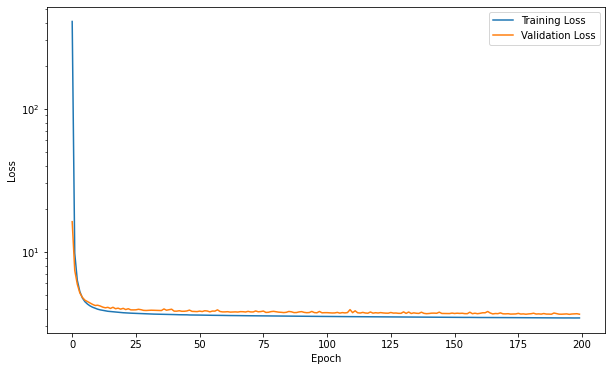

In [6]:
plt.rcParams["figure.figsize"] = (10,6)
mf.training_vs_validation_loss(fit_hist)

In [7]:
output = model.predict(ipd.clusters_v)

In [8]:
def gaus(x, mu, sigma, A):
    return (A/np.sqrt(2*np.pi * sigma**2))* np.exp(-(x-mu)**2 / (2*sigma**2))

def histo_output(arr_NN, arr_fit, arr_truth, name='', figsave=False, range_x = (-1,1), bins=300, fit=True):
    '''takes output of neural network (either x,y OR E), the fit values (either x,y, OR E) and the true values of e,y or E. 
    Define with name which parameter (x,y,E) you gave as input. Axis are in GeV or cm'''
    
    plt.rcParams["figure.figsize"] = (10,6)
    plt.subplot(2,1,1)
    n_counts, bins, patches = plt.hist(arr_NN-arr_truth, bins=bins, range=range_x)
    plt.title(name + " difference NN - truth")
    # fit
    if fit==True:
        maxv = n_counts.max()
        ind_fit = np.where(n_counts > 0.3*maxv)
        liml = ind_fit[0].min()
        limu = ind_fit[0].max() + 1

        x_centers = 0.5*(bins[:-1]+bins[1:])
        popt1, pcov1 = curve_fit(gaus, x_centers[liml:limu], n_counts[liml:limu], p0=[0,1, 100], sigma=1/np.sqrt(n_counts)[liml:limu], maxfev=10000)
        perr1 = np.sqrt(np.diag(pcov1))
        x_fit = np.linspace(x_centers[liml:limu][0], x_centers[liml:limu][-1], 500)
        y_fit = gaus(x_fit, *popt1)
        plt.plot(x_fit, y_fit, 'r--', label="Gaussian fit with " + r"$\mu = ({:.5f} \pm {:.5f})$".format(popt1[0], perr1[0]) + ", " + r"$\sigma = ({:.3f} \pm {:.3f})$".format(popt1[1], perr1[1]))
        plt.legend()
    
    plt.subplot(2,1,2)
    n_counts, bins, patches = plt.hist(arr_fit-arr_truth, bins=bins, range=range_x)
    plt.title(name + " difference fit - truth")
    
    if fit==True:
        # fit
        maxv = n_counts.max()
        ind_fit = np.where(n_counts > 0.3*maxv)
        liml = ind_fit[0].min()
        limu = ind_fit[0].max() + 1

        x_centers = 0.5*(bins[:-1]+bins[1:])
        popt2, pcov2 = curve_fit(gaus, x_centers[liml:limu], n_counts[liml:limu], p0=[0,1, 100], sigma=1/np.sqrt(n_counts)[liml:limu], maxfev=10000)
        perr2 = np.sqrt(np.diag(pcov2))
        x_fit = np.linspace(x_centers[liml:limu][0], x_centers[liml:limu][-1], 500)
        y_fit = gaus(x_fit, *popt2)
        plt.plot(x_fit, y_fit, 'r--', label="Gaussian fit with " + r"$\mu = ({:.5f} \pm {:.5f})$".format(popt2[0], perr2[0]) + ", " + r"$\sigma = ({:.3f} \pm {:.3f})$".format(popt2[1], perr2[1]))
        plt.legend()
    
    plt.tight_layout()
    if figsave == True:
        plt.savefig(name+"_histo.pdf")
    plt.show()
    
    if fit==True:
        return popt1, perr1, popt2, perr2 


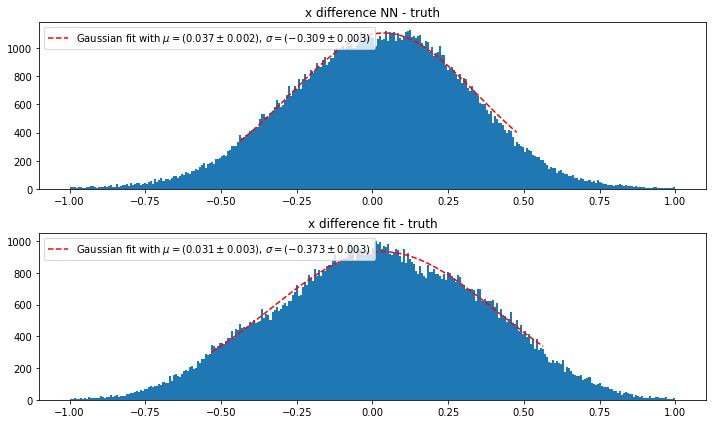

(array([ 3.71332244e-02, -3.08961313e-01,  8.55281089e+02]),
 array([1.81878422e-03, 2.55974600e-03, 5.64388044e+00]),
 array([ 3.14518854e-02, -3.73078158e-01,  8.73900140e+02]),
 array([2.50007670e-03, 3.49120271e-03, 6.53248271e+00]))

In [9]:
mf.histo_output(output.T[0], ipd.veri_fit.T[0], ipd.veri_truth.T[0], name="x", fit=True)

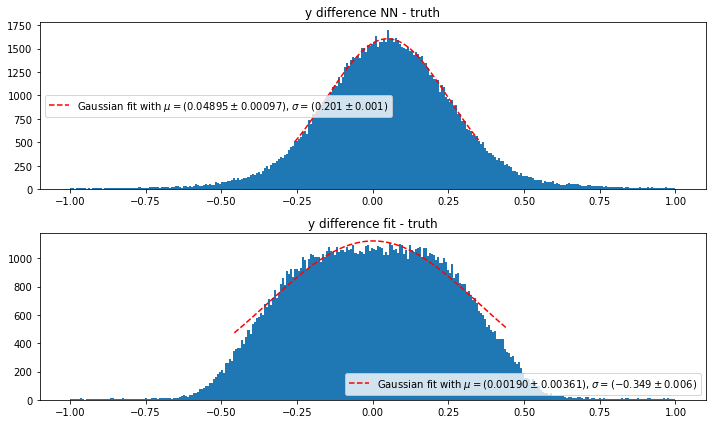

(array([4.89531088e-02, 2.01368664e-01, 8.09702031e+02]),
 array([9.66875452e-04, 1.33675795e-03, 4.29030086e+00]),
 array([ 1.90240960e-03, -3.48993734e-01,  9.82253393e+02]),
 array([3.60836947e-03, 5.75239045e-03, 1.28095452e+01]))

In [10]:
histo_output(output.T[1], ipd.veri_fit.T[1], ipd.veri_truth.T[1], name="y")

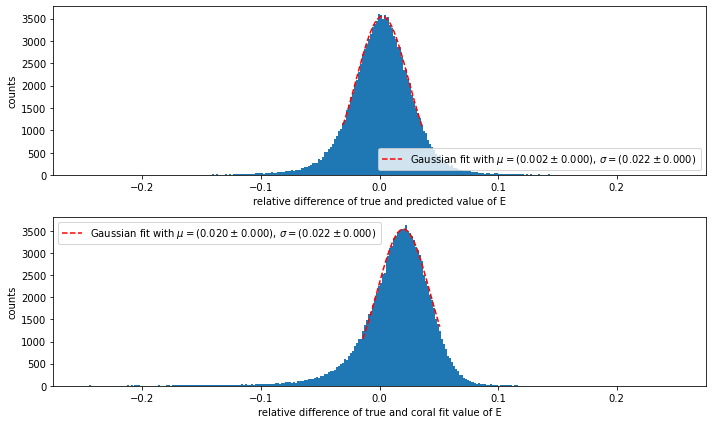

In [11]:
E_bad = mf.histo_output_relE(output.T[2], ipd.veri_fit.T[2], ipd.veri_truth.T[2], name="E", range_x=(-0.25,0.25), fit=True)

In [12]:
keras.models.save_model(model, 'stage3model_truely_correct_newdata_again')

INFO:tensorflow:Assets written to: stage3model_truely_correct_newdata_again/assets


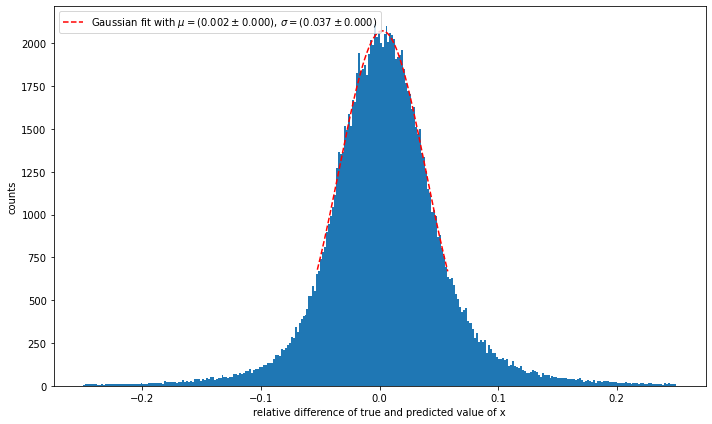

(array([3.72327217, 6.0401421 , 9.93450985, ..., 5.20558387, 4.60683474,
        5.54010934]),
 array([ 70.32051428,  18.22453323,  21.38119815, ..., 101.29088248,
        119.16951419,  74.52830215]))

In [13]:
mf.histo_output_relxy(output.T[0], ipd.veri_truth.T[0], ipd.veri_truth.T[2], name='x')

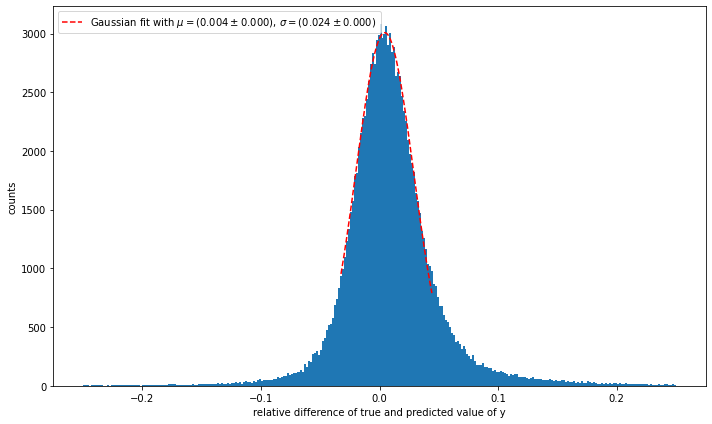

(array([ 7.355515  ,  8.22929175,  7.43877924, ...,  6.74107783,
         2.46870106, 13.13769089]),
 array([ 70.32051428,  18.22453323, 163.65285389, ...,   2.74735764,
         20.38086744,  21.39641383]))

In [14]:
mf.histo_output_relxy(output.T[1], ipd.veri_truth.T[1], ipd.veri_truth.T[2], name='y')

<h2> Summary </h2>

No difference to the last time...